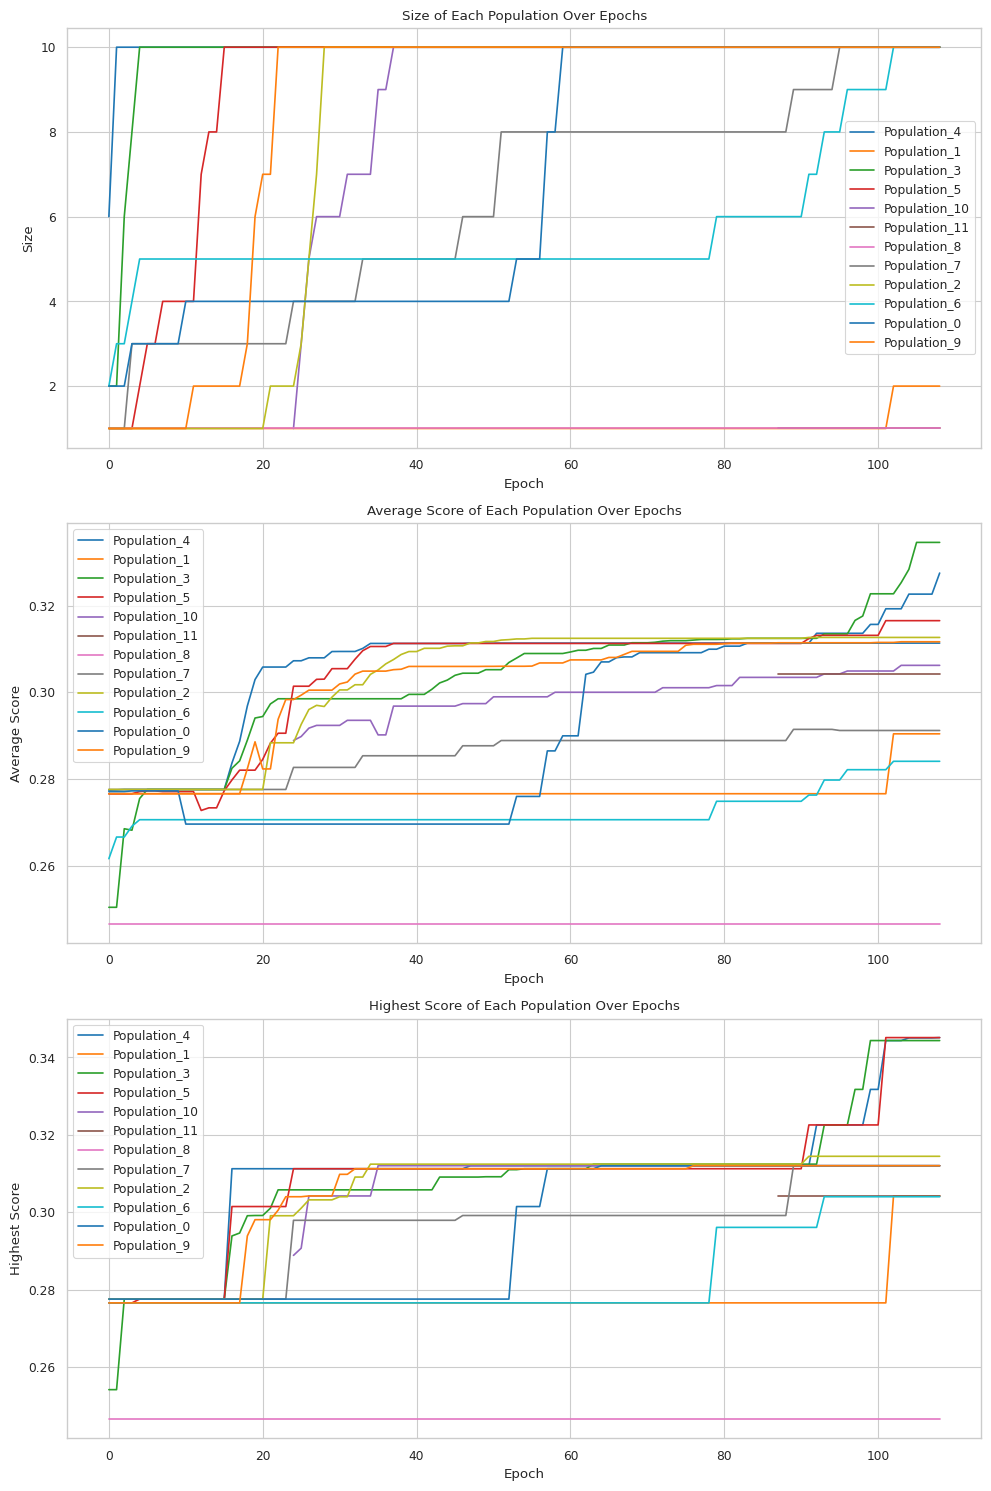

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
sns.set_context("paper")
sns.set_style("whitegrid")
file_path = './results/RQ4/population_data.pkl'population_data = pd.read_pickle(file_path)

epochs = [entry['epoch'] for entry in population_data]
populations = list(set([stat['label'] for entry in population_data for stat in entry['population_stats']]))

pop_data_filled = {pop: {'size': [np.nan]*len(epochs), 'average_score': [np.nan]*len(epochs), 'highest_score': [np.nan]*len(epochs)} for pop in populations}

for epoch_idx, entry in enumerate(population_data):
    for stat in entry['population_stats']:
        pop = stat['label']
        pop_data_filled[pop]['size'][epoch_idx] = stat['size']
        pop_data_filled[pop]['average_score'][epoch_idx] = stat['average_score']
        pop_data_filled[pop]['highest_score'][epoch_idx] = stat['highest_score']

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for pop in populations:
    axs[0].plot(epochs, pop_data_filled[pop]['size'], label=pop)
axs[0].set_title("Size of Each Population Over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Size")
axs[0].legend()

for pop in populations:
    axs[1].plot(epochs, pop_data_filled[pop]['average_score'], label=pop)
axs[1].set_title("Average Score of Each Population Over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Average Score")
axs[1].legend()

for pop in populations:
    axs[2].plot(epochs, pop_data_filled[pop]['highest_score'], label=pop)
axs[2].set_title("Highest Score of Each Population Over Epochs")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Highest Score")
axs[2].legend()

plt.tight_layout()
plt.show()